In [1]:
#import package
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [2]:
#import data
#data website(https://archive.ics.uci.edu/ml/datasets/Heart+Disease)
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df = df.drop(["fbs","oldpeak","thal"],axis = 1)

In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
restecg     0
thalach     0
exang       0
slope       0
ca          0
target      0
dtype: int64

In [5]:
sex = { 0:'Female', 1:'Male'}
cp = {0:'Typical Angina', 1:'Atypical Angina', 2:'Non-anginal Pain', 3:'Asymptomatic'}
ecg = {0 : 'Normal', 1:'ST-T', 2:'Left Ventricular Hypertrophy'}
ex = { 0:'no', 1:'yes'}
st_slope = {0:'Upsloping', 1:'Flat', 2:'Downsloping'}

In [6]:
df.columns = ['Age', 'Sex', 'Cp', 'Trestbps', 'Chol', 'Restecg', 'Thalach',
       'Exang', 'Slope', 'Ca','Target']

In [7]:
df['Sex'] = [sex[i] for i in df.Sex]
df['Cp'] = [cp[i] for i in df.Cp]
df['Restecg'] = [ecg[i] for i in df.Restecg]
df['Exang'] = [ex[i] for i in df.Exang]
df['Slope'] = [st_slope[i] for i in df.Slope]

In [8]:
df['Sex'] = df['Sex'].astype('category')
df['Cp'] = df['Cp'].astype('category')
df['Restecg'] = df['Restecg'].astype('category')
df['Exang'] = df['Exang'].astype('category')
df['Slope'] = df['Slope'].astype('category')

In [9]:
df.head()

,Age,Sex,Cp,Trestbps,Chol,Restecg,Thalach,Exang,Slope,Ca,Target
0,63,Male,Asymptomatic,145,233,Normal,150,no,Upsloping,0,1
1,37,Male,Non-anginal Pain,130,250,ST-T,187,no,Upsloping,0,1
2,41,Female,Atypical Angina,130,204,Normal,172,no,Downsloping,0,1
3,56,Male,Atypical Angina,120,236,ST-T,178,no,Downsloping,0,1
4,57,Female,Typical Angina,120,354,ST-T,163,yes,Downsloping,0,1


C:\Users\Jessie Hwang\Anaconda3\ana\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Jessie Hwang\Anaconda3\ana\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Jessie Hwang\Anaconda3\ana\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Jessie Hwang\Anaconda3\ana\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2

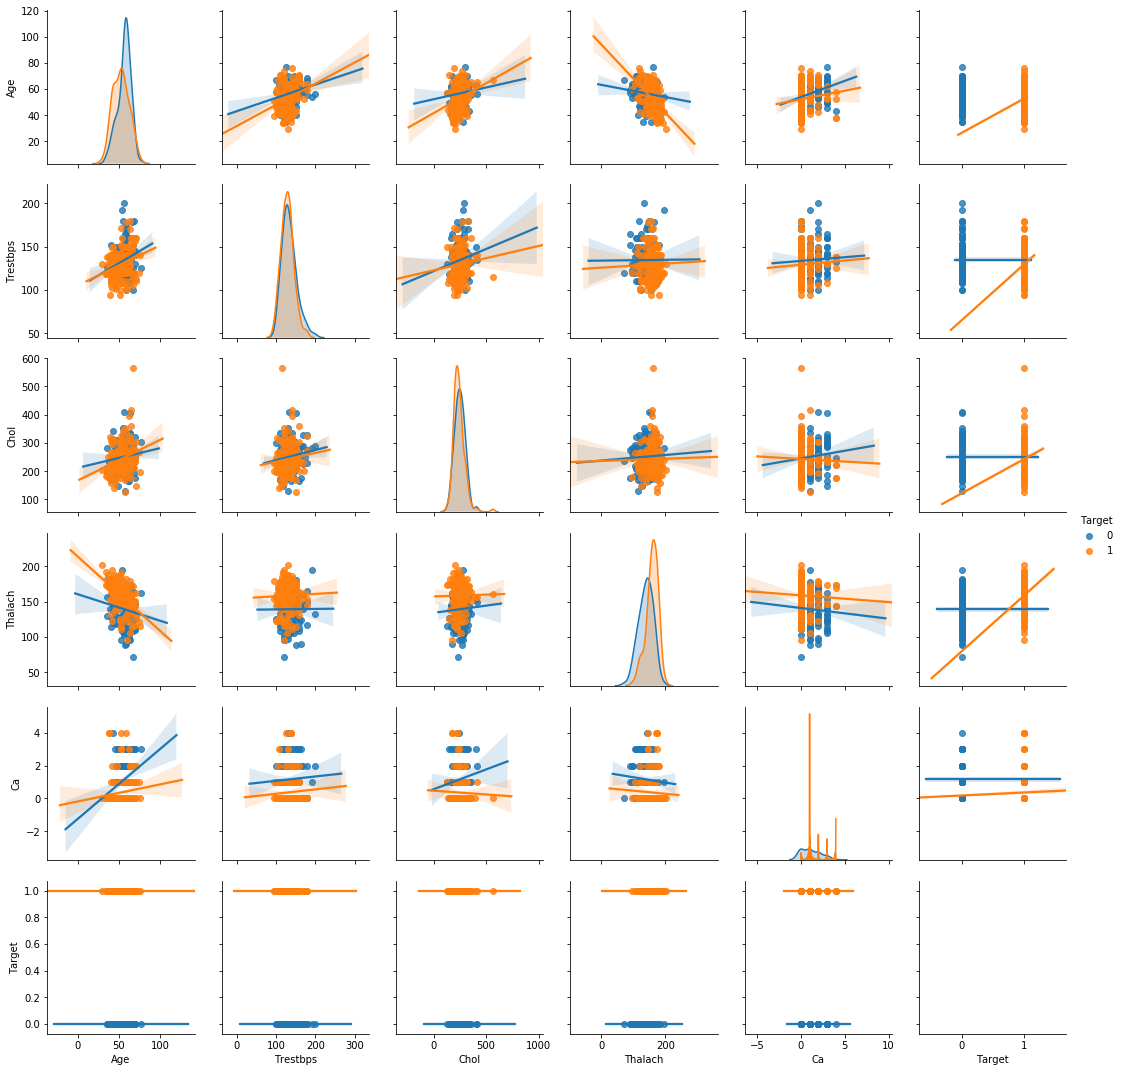

In [10]:
#pairplot
ax=sns.pairplot(df,kind='reg',hue='Target',size=2.5)
ax

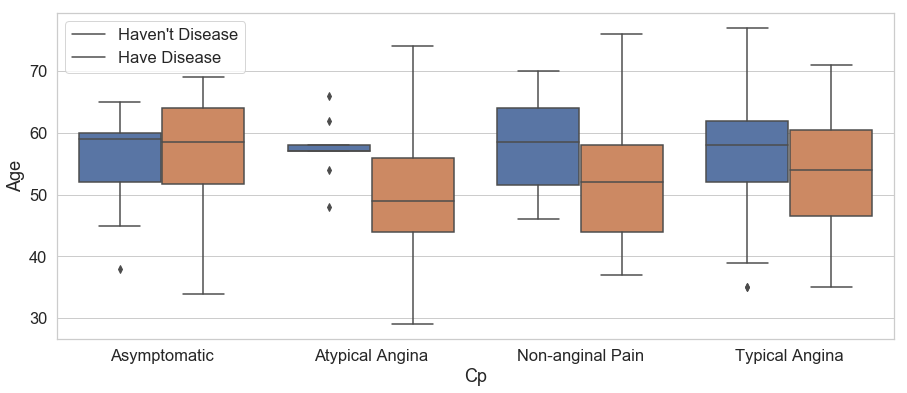

In [12]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df.Cp,y=df.Age,hue=df.Target)
plt.xticks(rotation=0)
plt.legend(["No Disease", "Have Disease"])
plt.show()

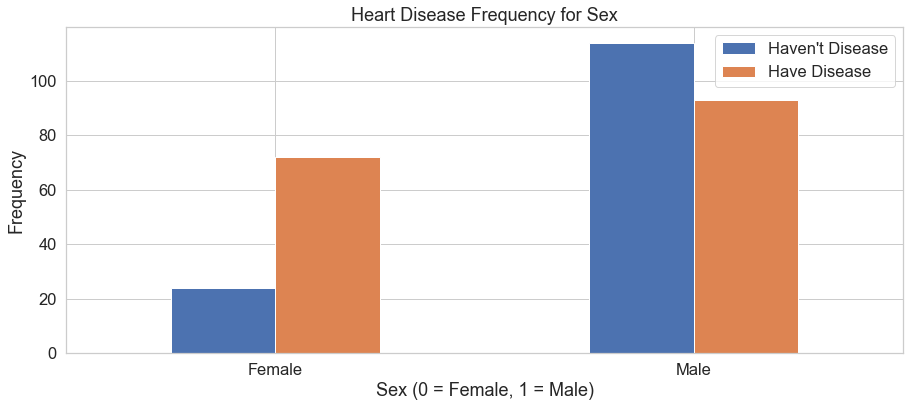

In [13]:
pd.crosstab(df.Sex,df.Target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

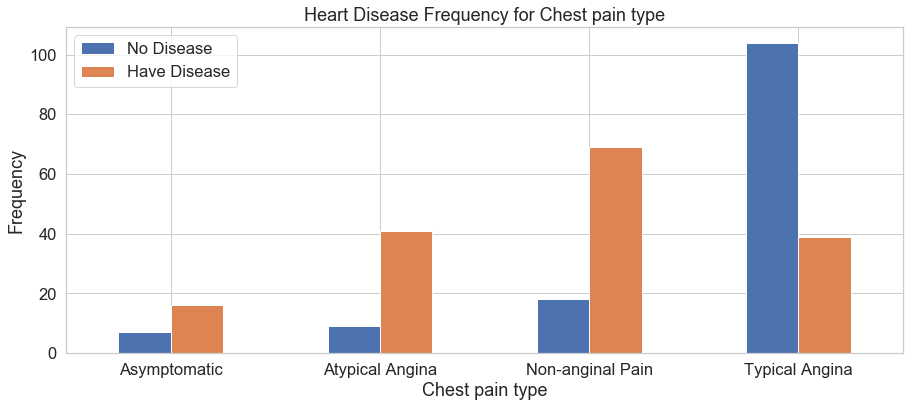

In [33]:
pd.crosstab(df.Cp,df.Target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for Chest pain type')
plt.xlabel('Chest pain type')
plt.xticks(rotation=0)
plt.legend(["No Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

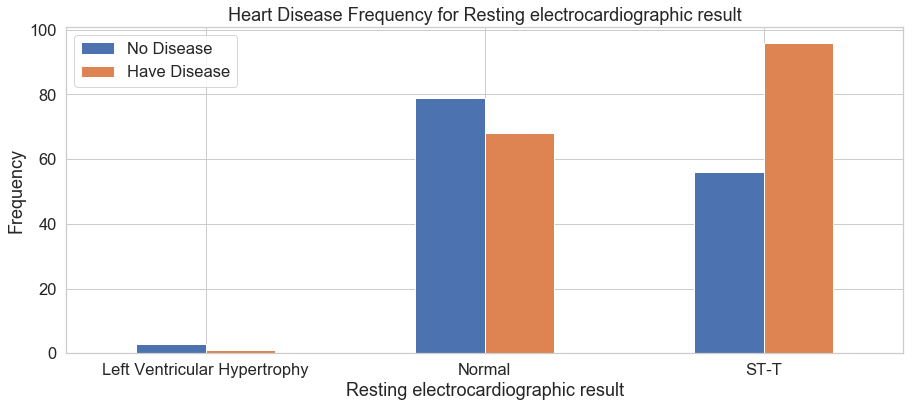

In [34]:
pd.crosstab(df.Restecg,df.Target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for Resting electrocardiographic result')
plt.xlabel('Resting electrocardiographic result')
plt.xticks(rotation=0)
plt.legend(["No Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

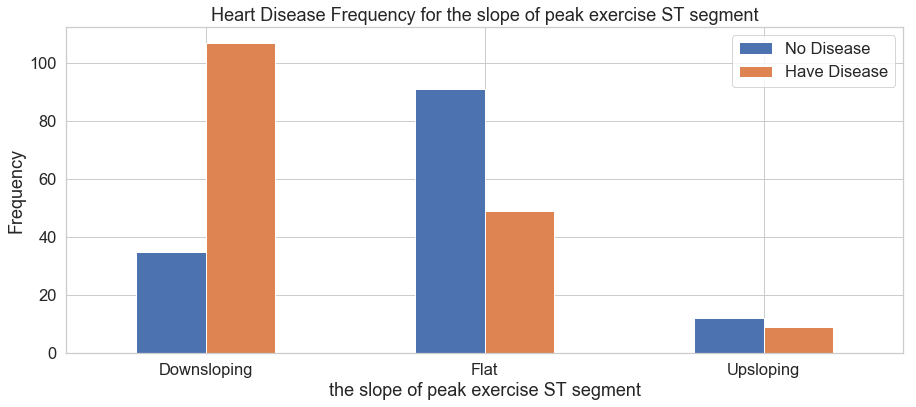

In [35]:
pd.crosstab(df.Slope,df.Target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for the slope of peak exercise ST segment')
plt.xlabel('the slope of peak exercise ST segment')
plt.xticks(rotation=0)
plt.legend(["No Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

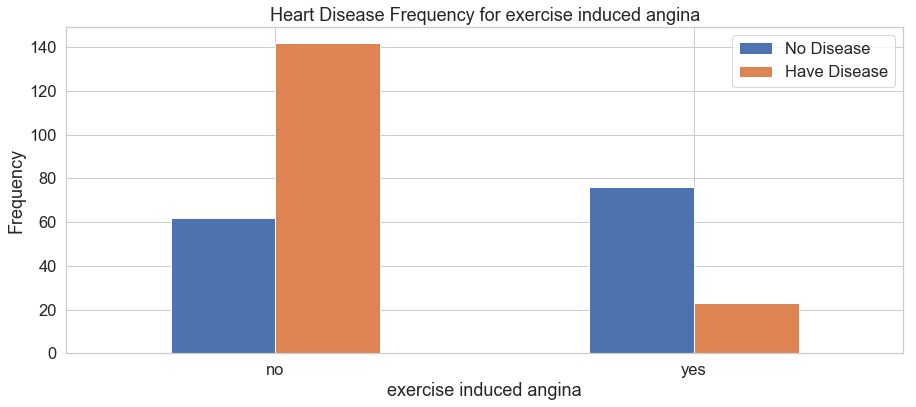

In [36]:
pd.crosstab(df.Exang,df.Target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for exercise induced angina')
plt.xlabel('exercise induced angina')
plt.xticks(rotation=0)
plt.legend(["No Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

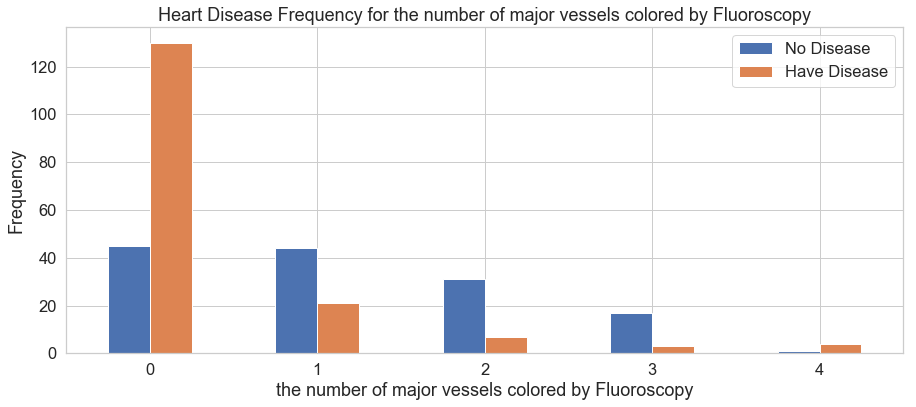

In [37]:
pd.crosstab(df.Ca,df.Target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for the number of major vessels colored by Fluoroscopy')
plt.xlabel('the number of major vessels colored by Fluoroscopy')
plt.xticks(rotation=0)
plt.legend(["No Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

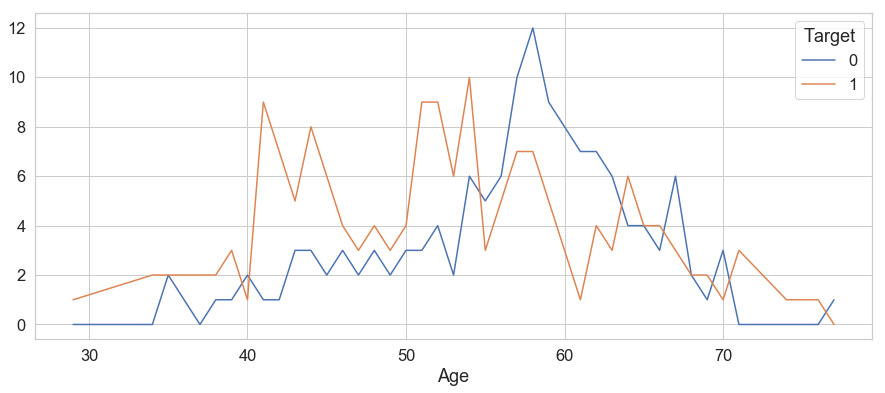

In [14]:
pd.crosstab(df.Age,df.Target).plot(kind="line",figsize=(15,6))

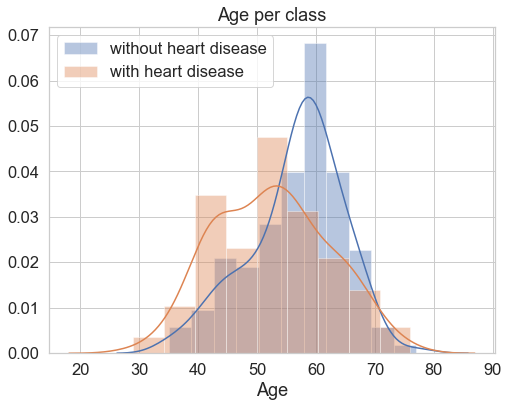

In [30]:
plt.figure(figsize=(8, 6))
sns.distplot(df[df.Target == 0]['Age'], label='without heart disease')
sns.distplot(df[df.Target == 1]['Age'], label='with heart disease')
plt.xlabel('Age')
plt.title('Age per class')
plt.legend()
plt.show()

In [24]:
no=df[df.Target==0]
yes=df[df.Target==1]

In [47]:
young_ages=df[(df.Age>=10)&(df.Age<40)]
middle_ages=df[(df.Age>=40)&(df.Age<55)]
elderly_ages=df[(df.Age>55)]

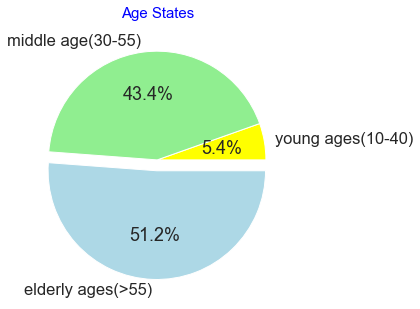

In [48]:
colors = ['yellow','lightgreen','lightblue']
explode = [0,0,0.1]
plt.figure(figsize = (5,5))

plt.pie([len(young_ages),len(middle_ages),len(elderly_ages)],labels=['young ages(10-40)','middle age(30-55)','elderly ages(>55)'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.title('Age States',color = 'blue',fontsize = 15)
plt.show()

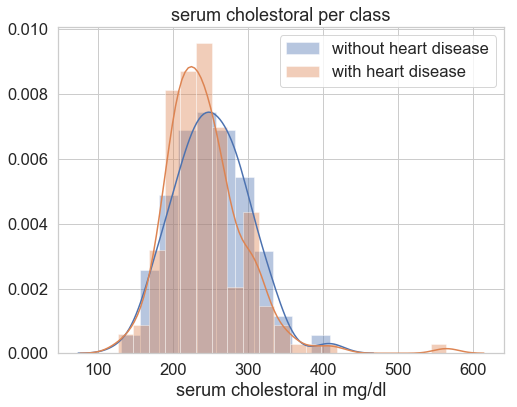

In [29]:
plt.figure(figsize=(8, 6))
sns.distplot(df[df.Target == 0]['Chol'], label='without heart disease')
sns.distplot(df[df.Target == 1]['Chol'], label='with heart disease')
plt.xlabel('serum cholestoral in mg/dl')
plt.title('serum cholestoral per class')
plt.legend()
plt.show()

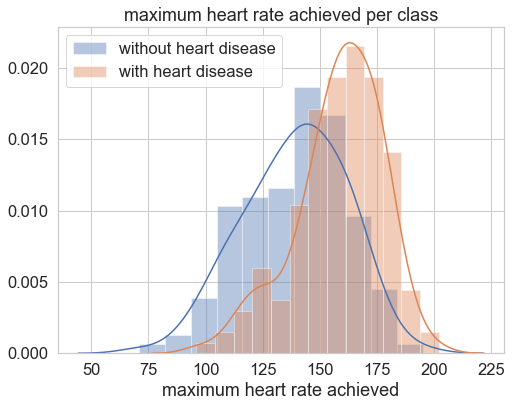

In [32]:
plt.figure(figsize=(8, 6))
sns.distplot(df[df.Target == 0]['Thalach'], label='without heart disease')
sns.distplot(df[df.Target == 1]['Thalach'], label='with heart disease')
plt.title('maximum heart rate achieved per class')
plt.xlabel('maximum heart rate achieved')
plt.legend()
plt.show()

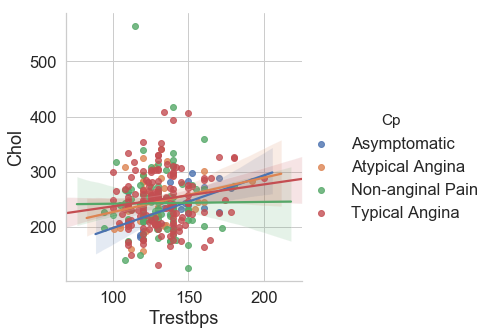

In [49]:
sns.lmplot(x="Trestbps", y="Chol",data=df,hue="Cp")
plt.show()

In [ ]:
df = pd.get_dummies(df)
df.head()
df.info()

In [ ]:
x= df[['Ca','Cp_Asymptomatic','Cp_Atypical Angina','Cp_Non-anginal Pain','Cp_Typical Angina']]
y=df[['Target']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=42)

In [ ]:
#classification model
#logistic regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
score1=metrics.accuracy_score(y_test, y_pred)
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(score1))

In [ ]:
x= df[['Ca','Cp_Asymptomatic','Cp_Atypical Angina','Cp_Non-anginal Pain','Cp_Typical Angina','Age']]
y=df[['Target']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=42)

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
score1=metrics.accuracy_score(y_test, y_pred)
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(score1))

In [ ]:
x= df[['Ca','Cp_Asymptomatic','Cp_Atypical Angina','Cp_Non-anginal Pain','Cp_Typical Angina','Age','Trestbps']]
y=df[['Target']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=42)

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
score1=metrics.accuracy_score(y_test, y_pred)
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(score1))

In [ ]:
x= df[['Ca','Cp_Asymptomatic','Cp_Atypical Angina','Cp_Non-anginal Pain','Cp_Typical Angina','Age','Trestbps','Chol']]
y=df[['Target']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=42)

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
score1=metrics.accuracy_score(y_test, y_pred)
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(score1))

In [ ]:
#the accuracy are keep being the same after I add chole and trestbps,
#this time I add the Thalach and the accuracy increased
x= df[['Ca','Cp_Asymptomatic','Cp_Atypical Angina','Cp_Non-anginal Pain','Cp_Typical Angina','Age','Thalach']]
y=df[['Target']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=42)

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
score1=metrics.accuracy_score(y_test, y_pred)
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(score1))

In [ ]:
#sex increase the accuracy
x= df[['Ca','Cp_Asymptomatic','Cp_Atypical Angina','Cp_Non-anginal Pain','Cp_Typical Angina','Age','Thalach','Sex_Female','Sex_Male']]
y=df[['Target']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=42)

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
score1=metrics.accuracy_score(y_test, y_pred)
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(score1))

In [ ]:
x= df[['Ca','Cp_Asymptomatic','Cp_Atypical Angina','Cp_Non-anginal Pain','Cp_Typical Angina','Age','Trestbps','Chol','Thalach','Sex_Female','Sex_Male','Restecg_Left Ventricular Hypertrophy','Restecg_Normal','Restecg_ST-T']]
y=df[['Target']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=42)

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
score1=metrics.accuracy_score(y_test, y_pred)
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(score1))

In [ ]:
#slope decrease the accuacy
x= df[['Ca','Cp_Asymptomatic','Cp_Atypical Angina','Cp_Non-anginal Pain','Cp_Typical Angina','Age','Thalach','Sex_Female','Sex_Male','Slope_Downsloping','Slope_Flat','Slope_Upsloping']]
y=df[['Target']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=42)

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
score1=metrics.accuracy_score(y_test, y_pred)
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(score1))

In [ ]:
#the final x
x= df[['Ca','Cp_Asymptomatic','Cp_Atypical Angina','Cp_Non-anginal Pain','Cp_Typical Angina','Age','Thalach','Sex_Female','Sex_Male']]
y=df[['Target']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=42)

In [ ]:
#classification model
#logistic regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
score1=metrics.accuracy_score(y_test, y_pred)
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(score1))
matrix =confusion_matrix(y_test, y_pred)
print(matrix)
report = classification_report(y_test, y_pred)
print(report)

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

# fit the data into the model
clf = DecisionTreeClassifier().fit(x_train, y_train)
y_pred = clf.predict(x_test)

score2=metrics.accuracy_score(y_test, y_pred)

# calculate the accurracy in test set
print('Accuracy of decision tree classifier on test set: {:.2f}'
     .format(score2))
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
report = classification_report(y_test, y_pred)
print(report)

In [ ]:
k_range=list(range(1,25))
score=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    score.append(metrics.accuracy_score(y_test,y_pred))

In [ ]:
plt.plot(k_range,score)
plt.xlabel("value of k")
plt.ylabel("Accuracy")

In [ ]:
score

In [ ]:
#KNN
knn = KNeighborsClassifier(n_neighbors=14)

# fit the data into the model
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

score3=metrics.accuracy_score(y_test, y_pred)


# calculate the accurracy in test set
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(score3))
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
report = classification_report(y_test, y_pred)
print(report)